WE ARE TRYING TO FIND THE VENUES IN CHENNAI CITY AND ANALYZE HOW THE VENUES ARE DISTRIBUTED AMINGNST THE NEIGHBORHOODS

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='c4b794ee-6679-4b4a-9a2b-31eedbb2747e', project_access_token='p-24e21f779309094abb34ebbb111c54ca7255f3e7')
pc = project.project_context

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
!pip install geocoder
from geopy.geocoders import Nominatim
#!conda install -c conda-forge folium=0.5.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 10.1 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

# FOURSQUARE

In [3]:
#@hidden_cell
from pandas.io.json import json_normalize
radius = 1000
LIMIT = 30

CLIENT_ID = 'IVOC3IMFG1KW21LUODLTVB5SZYZGMUGWPDGZSH1A2DIYP2WC' #  Foursquare ID
CLIENT_SECRET = 'U41NKKZMMPEBTHL4XX2PMNSECHBQ2VQOPKSM5TUBSIA321HK' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IVOC3IMFG1KW21LUODLTVB5SZYZGMUGWPDGZSH1A2DIYP2WC
CLIENT_SECRET:U41NKKZMMPEBTHL4XX2PMNSECHBQ2VQOPKSM5TUBSIA321HK


In [4]:
address = 'Chennai, TN'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
print((location.latitude, location.longitude))

(13.0836939, 80.270186)


In [5]:
latitude = location.latitude
longitude = location.longitude

In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id=IVOC3IMFG1KW21LUODLTVB5SZYZGMUGWPDGZSH1A2DIYP2WC&client_secret=U41NKKZMMPEBTHL4XX2PMNSECHBQ2VQOPKSM5TUBSIA321HK&ll=13.0836939,80.270186&v=20180604&radius=1000&limit=30'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IVOC3IMFG1KW21LUODLTVB5SZYZGMUGWPDGZSH1A2DIYP2WC&client_secret=U41NKKZMMPEBTHL4XX2PMNSECHBQ2VQOPKSM5TUBSIA321HK&ll=13.0836939,80.270186&v=20180604&radius=1000&limit=30'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '606ed6c6a465a5165e1de145'},
 'response': {'venues': [{'id': '4cdce884df986ea8f4a9d216',
    'name': 'Periamet Mosque',
    'location': {'lat': 13.085073629776138,
     'lng': 80.26903493458451,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.085073629776138,
       'lng': 80.26903493458451}],
     'distance': 197,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['India']},
    'categories': [{'id': '4bf58dd8d48988d138941735',
      'name': 'Mosque',
      'pluralName': 'Mosques',
      'shortName': 'Mosque',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_mosque_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1617876678',
    'hasPerk': False},
   {'id': '5f9fe096282c3e214ff967a1',
    'name': "Kaf's Cafe",
    'location': {'address': '2/3, Wuthucatton Street,',
     'lat': 13.08442,
     'lng': 80.26823,
     'labeledLatLngs': [{'label': 'display',
     

In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
venues = results['response']['venues']
nearby_venues = json_normalize(venues)
nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.neighborhood,location.city,location.state,location.crossStreet
0,4cdce884df986ea8f4a9d216,Periamet Mosque,"[{'id': '4bf58dd8d48988d138941735', 'name': 'M...",v-1617876678,False,13.085074,80.269035,"[{'label': 'display', 'lat': 13.08507362977613...",197,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
1,5f9fe096282c3e214ff967a1,Kaf's Cafe,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",v-1617876678,False,13.084420,80.268230,"[{'label': 'display', 'lat': 13.08442, 'lng': ...",226,IN,India,"[2/3, Wuthucatton Street,, Chennai 600003, Tam...","2/3, Wuthucatton Street,",600003,Periyamet,Chennai,Tamil Nadu,NaN
2,559ebd94498eba17e2ff0d9d,Domino's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1617876678,False,13.084000,80.270000,"[{'label': 'display', 'lat': 13.084, 'lng': 80...",39,IN,India,"[78, Ground Floor, Medavakkam Main Road, Opp ...","78, Ground Floor, Medavakkam Main Road, Opp A...",600117,NaN,Chennai,Tamil Nadu,NaN
3,5092ae55e4b07db78b9fdb4f,hotel pearl international,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1617876678,False,13.082896,80.270536,"[{'label': 'display', 'lat': 13.08289602329783...",96,IN,India,[India],NaN,NaN,NaN,NaN,NaN,NaN
4,50e8f529e4b0ce747c102369,The Royal Star,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1617876678,False,13.083584,80.270310,"[{'label': 'display', 'lat': 13.083584, 'lng':...",18,IN,India,"[No 54 Sydenhams Road (Periamet, Opp. Jawahari...",No 54 Sydenhams Road,600 003,NaN,Chennai,Tamil Nadu,"Periamet, Opp. Jawaharial Nerdu Stadium"


In [10]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# DATA COLLECTION

In [12]:
my_file1 = project.get_file("Chennai neighbourhood.xlsx")
my_file1.seek(0)
df_neighbour = pd.read_excel(my_file1, encoding='latin-1', index_col=None)

In [13]:
df_neighbour.head()

,Area,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9880,80.2047
1,Adyar,South and East Chennai,13.0012,80.2565
2,Alandur,South and East Chennai,12.9975,80.2006
3,Alapakkam,West Chennai,13.0490,80.1673
4,Alwarthirunagar,West Chennai,13.0426,80.1840


In [14]:
chennai_venues = getNearbyVenues(names=df_neighbour['Area'],
                                   latitudes=df_neighbour['Latitude'],
                                   longitudes=df_neighbour['Longitude']
                                  )

Adambakkam
Adyar
Alandur
Alapakkam
Alwarthirunagar
Ambattur
Aminjikarai
Anna Nagar
Annanur
Arumbakkam
Ashok Nagar
Avadi
Ayappakkam
Basin Bridge
Besant Nagar
Broadway
Central
Chetpet
Choolai
MMDA Colony
Defence Colony
Egmore
Ennore
Erukanchery
George Town
Gerugambakkam
Gopalapuram
Guindy
Hastinapuram
ICF Colony
Injambakkam
Irumbuliyur
Iyyapanthangal
Jamalia
K.K. Nagar
Kadaperi
Kallikuppam
Karambakkam
Kathirvedu
Kathivakkam
Keelkattalai
Kodungaiyur
Kolappakkam
Kolathur
Korattur
Korukkupet
Kosapet
Kottivakkam
Kovilambakkam
Koyambedu
Kundrathur
Lakshmipuram
M.G.R. Garden
M.G.R. Nagar
M.K.B. Nagar
Madhavaram
Madhavaram Milk Colony
Madipakkam
Maduravoyal
Mambakkam
Manali
Manali New Town
manapakkam
Mangadu
Manjambakkam
Mannadi
Mathur MMDA
Medavakkam
Minjur
Mogappair
Moolakadai
Mowlivakkam
Mudichur
Mugalivakkam
Mylapore
Nagalkeni
Nandambakkam
Nanganallur
Naravarikuppam
Neelankarai
Nerkundrum
Nesapakkam
New Washermenpet
Nolambur
Old Washermenpet
Oragadam
Otteri
Padi
Palavakkam
Pallavaram
Pallik

In [15]:
chennai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.9880,80.2047,Venkateshwara Super Market,12.986320,80.205168,Department Store
1,Adambakkam,12.9880,80.2047,Ibaco,12.988729,80.205646,Dessert Shop
2,Adambakkam,12.9880,80.2047,Deepam Restaurant,12.985380,80.205281,Indian Restaurant
3,Adambakkam,12.9880,80.2047,ibaco Adambakkam,12.987358,80.200504,Ice Cream Shop
4,Adyar,13.0012,80.2565,Zha Cafe,12.999730,80.254806,Café


In [16]:
chennai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adambakkam,4,4,4,4,4,4
Adyar,15,15,15,15,15,15
Alandur,6,6,6,6,6,6
Alapakkam,3,3,3,3,3,3
Alwarthirunagar,11,11,11,11,11,11
...,...,...,...,...,...,...
Vepery,5,5,5,5,5,5
Villivakkam,4,4,4,4,4,4
Virugambakkam,3,3,3,3,3,3


# ANALYSIS

In [17]:
chennai_onehot = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chennai_onehot['Neighborhood'] = chennai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]

chennai_onehot.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theater,Theme Park,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
chennai_onehot.shape

(871, 158)

In [19]:
for col in chennai_onehot.columns: 
    print(col) 

Neighborhood
ATM
African Restaurant
American Restaurant
Antique Shop
Arcade
Art Gallery
Art Museum
Arts & Crafts Store
Asian Restaurant
Astrologer
Athletics & Sports
BBQ Joint
Baby Store
Badminton Court
Bagel Shop
Bakery
Bank
Bar
Beach
Bike Rental / Bike Share
Bistro
Boarding House
Bookstore
Boutique
Bowling Alley
Breakfast Spot
Buffet
Burger Joint
Bus Station
Bus Stop
Business Service
Cafeteria
Café
Chettinad Restaurant
Chinese Restaurant
Chocolate Shop
Clothing Store
Coffee Shop
Comfort Food Restaurant
Concert Hall
Construction & Landscaping
Convenience Store
Cosmetics Shop
Cricket Ground
Department Store
Dessert Shop
Diner
Dog Run
Electronics Store
Event Space
Farm
Farmers Market
Fast Food Restaurant
Fish Market
Fishing Store
Flea Market
Flower Shop
Food
Food & Drink Shop
Food Court
Food Truck
Fried Chicken Joint
Fruit & Vegetable Store
Furniture / Home Store
Gift Shop
Golf Course
Grocery Store
Gym
Gym / Fitness Center
Gym Pool
Halal Restaurant
Harbor / Marina
Health & Beauty Servic

In [20]:
chennai_grouped = chennai_onehot.groupby('Neighborhood').mean().reset_index()
chennai_grouped.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theater,Theme Park,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Adambakkam,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.066667,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,Alandur,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0
3,Alapakkam,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,Alwarthirunagar,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0


In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_grouped['Neighborhood']

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Ice Cream Shop,Indian Restaurant,Department Store,Dessert Shop,Farm,Flower Shop,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant
1,Adyar,Indian Restaurant,Pizza Place,Café,Electronics Store,Asian Restaurant,Food Court,Sandwich Place,Fast Food Restaurant,Middle Eastern Restaurant,Department Store
2,Alandur,Indian Restaurant,Train Station,Metro Station,Breakfast Spot,Women's Store,Event Space,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant
3,Alapakkam,Fast Food Restaurant,Indian Restaurant,Women's Store,Event Space,Flower Shop,Flea Market,Fishing Store,Fish Market,Farmers Market,Farm
4,Alwarthirunagar,Fast Food Restaurant,Clothing Store,Ice Cream Shop,Café,Indian Restaurant,Gym,Juice Bar,Pizza Place,Vegetarian / Vegan Restaurant,Art Museum


In [22]:
# We'll cluster venues 

k=5
chennai_clustering = chennai_grouped.drop(['Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(chennai_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 3, 0, 0, 4, 3, 0, 2, 4, 0, 3, 0, 3, 3, 3, 3, 0, 1,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 0, 3, 0, 2,
       3, 3, 1, 0, 0, 3, 2, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 2,
       0, 0, 0, 3, 0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3,
       3, 3, 0, 0, 4, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 2, 0, 4, 0,
       2, 3, 0, 0, 3, 3, 3, 3, 0, 4, 3, 3, 2, 0, 0, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 4, 3, 0, 0, 1, 0, 0, 0], dtype=int32)

In [23]:
df_neighbour = df_neighbour.rename(columns = {"Area":"Neighborhood"}) 

In [24]:
df_neighbour.head()

,Neighborhood,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9880,80.2047
1,Adyar,South and East Chennai,13.0012,80.2565
2,Alandur,South and East Chennai,12.9975,80.2006
3,Alapakkam,West Chennai,13.0490,80.1673
4,Alwarthirunagar,West Chennai,13.0426,80.1840


In [25]:
chennai_denc_merged = df_neighbour
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# merge chennai_grouped with df_neighbour to add latitude/longitude for each neighborhood
chennai_denc_merged = chennai_denc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chennai_denc_merged.head()

,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,12.9880,80.2047,0.0,Ice Cream Shop,Indian Restaurant,Department Store,Dessert Shop,Farm,Flower Shop,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant
1,Adyar,South and East Chennai,13.0012,80.2565,0.0,Indian Restaurant,Pizza Place,Café,Electronics Store,Asian Restaurant,Food Court,Sandwich Place,Fast Food Restaurant,Middle Eastern Restaurant,Department Store
2,Alandur,South and East Chennai,12.9975,80.2006,0.0,Indian Restaurant,Train Station,Metro Station,Breakfast Spot,Women's Store,Event Space,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant
3,Alapakkam,West Chennai,13.0490,80.1673,0.0,Fast Food Restaurant,Indian Restaurant,Women's Store,Event Space,Flower Shop,Flea Market,Fishing Store,Fish Market,Farmers Market,Farm
4,Alwarthirunagar,West Chennai,13.0426,80.1840,0.0,Fast Food Restaurant,Clothing Store,Ice Cream Shop,Café,Indian Restaurant,Gym,Juice Bar,Pizza Place,Vegetarian / Vegan Restaurant,Art Museum


In [26]:
#chennai_denc_merged[['Cluster Labels']] = chennai_denc_merged[['Cluster Labels']].astype(int)
chennai_denc_merged = chennai_denc_merged.fillna(0)

In [27]:
chennai_denc_merged = chennai_denc_merged.astype({'Cluster Labels': 'int'})
print(chennai_denc_merged[['Cluster Labels']])

     Cluster Labels
0                 0
1                 0
2                 0
3                 0
4                 0
..              ...
171               3
172               0
173               0
174               3
175               3

[176 rows x 1 columns]


# INFERENCE

In [32]:
chennai_denc_merged.loc[chennai_denc_merged['Cluster Labels'] == 0, chennai_denc_merged.columns[[1] + list(range(5, chennai_denc_merged.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South and East Chennai,Ice Cream Shop,Indian Restaurant,Department Store,Dessert Shop,Farm,Flower Shop,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant
1,South and East Chennai,Indian Restaurant,Pizza Place,Café,Electronics Store,Asian Restaurant,Food Court,Sandwich Place,Fast Food Restaurant,Middle Eastern Restaurant,Department Store
2,South and East Chennai,Indian Restaurant,Train Station,Metro Station,Breakfast Spot,Women's Store,Event Space,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant
3,West Chennai,Fast Food Restaurant,Indian Restaurant,Women's Store,Event Space,Flower Shop,Flea Market,Fishing Store,Fish Market,Farmers Market,Farm
4,West Chennai,Fast Food Restaurant,Clothing Store,Ice Cream Shop,Café,Indian Restaurant,Gym,Juice Bar,Pizza Place,Vegetarian / Vegan Restaurant,Art Museum
...,...,...,...,...,...,...,...,...,...,...,...
167,Southern-Eastern Suburbs of Chennai,Indian Restaurant,Women's Store,Event Space,Flower Shop,Flea Market,Fishing Store,Fish Market,Fast Food Restaurant,Farmers Market,Farm
169,Southern-Eastern Suburbs of Chennai,Bakery,Hotel,Indian Restaurant,Train Station,North Indian Restaurant,Women's Store,Electronics Store,Fishing Store,Fish Market,Fast Food Restaurant
170,Suburbs along ECR and OMR of Chennai,Fast Food Restaurant,Coffee Shop,Indian Restaurant,Vegetarian / Vegan Restaurant,Movie Theater,Furniture / Home Store,Women's Store,Event Space,Fishing Store,Fish Market
172,Suburbs along ECR and OMR of Chennai,Coffee Shop,Indian Restaurant,Theme Park,Museum,Women's Store,Electronics Store,Fishing Store,Fish Market,Fast Food Restaurant,Farmers Market


In [28]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        chennai_denc_merged['Latitude'], 
        chennai_denc_merged['Longitude'], 
        chennai_denc_merged['Neighborhood'], 
        chennai_denc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [106]:
#chennai_total
chennai_total_count= chennai_total['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='counts')

#When we look at the clustering interestingly Cluster 0 and 3 have the most neighborhoods

chennai_denc_merged_cluster = chennai_denc_merged['Cluster Labels'].value_counts().rename_axis('Cluster Labels').reset_index(name='Neighborhoods')
chennai_denc_merged_cluster.set_index('Cluster Labels')


,Neighborhoods
Cluster Labels,
0,85
3,71
2,8
4,7
1,5


,Venues
Location,
North Chennai,57
South and East Chennai,48
West Chennai,45
Northern Suburbs of Chennai,7
Suburbs along ECR and OMR of Chennai,6
Western Suburbs of Chennai,6
Southern-Eastern Suburbs of Chennai,5
Suburban Chennai,2


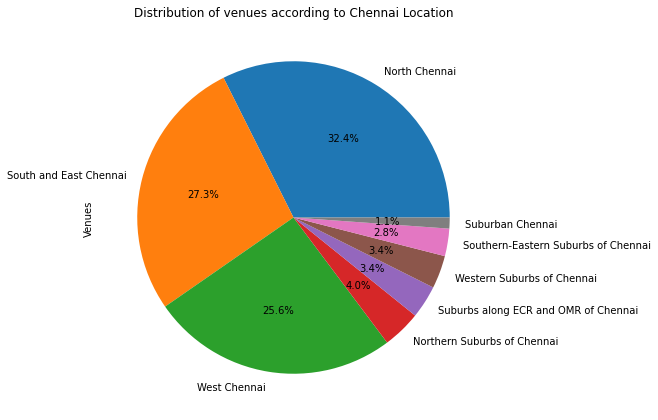

In [108]:

import matplotlib.pyplot as plt
from pandas.plotting import table

chennai_denc_merged_Location = chennai_denc_merged['Location'].value_counts().rename_axis('Location').reset_index(name='Venues')
chennai_denc_merged_Location_pie = chennai_denc_merged_Location.set_index('Location')
chennai_denc_merged_Location_pie

plot = (chennai_denc_merged_Location_pie.plot.pie(y='Venues',autopct='%1.1f%%', figsize=(7, 15), legend = False, title = 'Distribution of venues according to Chennai Location'))
chennai_denc_merged_Location_pie


In [63]:
from tabulate import tabulate

#chennai_venues_Neighborhood = chennai_venues.groupby("Neighborhood").count()

chennai_venues_Neighborhood = chennai_venues['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='Total venues')
chennai_venues_category = chennai_venues['Venue Category'].value_counts().rename_axis('Venue Category').reset_index(name='Count')
chennai_venues_category_top10 = chennai_venues_category.head(10)
chennai_venues_names = chennai_venues['Venue'].value_counts().rename_axis('Venue').reset_index(name='Count')
chennai_venues_names_top10 = chennai_venues_names.head(10)
chennai_venues_Neighborhood_top10 = chennai_venues_Neighborhood.nlargest(10, ['Total venues']) 

print("\nTop 10 Neighborhoods with most venue categories:")
print(tabulate((chennai_venues_Neighborhood_top10),headers='keys', tablefmt='psql'))
print("\nTop 10 Venue Categories in Chennai:")
print(tabulate((chennai_venues_category_top10),headers='keys', tablefmt='psql'))
print("\nTop 10 Venues in Chennai:")
print(tabulate((chennai_venues_names_top10),headers='keys', tablefmt='psql'))



Top 10 Neighborhoods with most venue categories:
+----+-----------------+----------------+
|    | Neighborhood    |   Total venues |
|----+-----------------+----------------|
|  0 | T. Nagar        |             30 |
|  1 | Gopalapuram     |             30 |
|  2 | Anna Nagar      |             30 |
|  3 | Kelambakkam     |             30 |
|  4 | Vadapalani      |             28 |
|  5 | Thousand Lights |             26 |
|  6 | Besant Nagar    |             21 |
|  7 | Broadway        |             21 |
|  8 | Guindy          |             16 |
|  9 | Kancheepuram    |             15 |
+----+-----------------+----------------+

Top 10 Venue Categories in Chennai:
+----+-------------------------------+---------+
|    | Venue Category                |   Count |
|----+-------------------------------+---------|
|  0 | Indian Restaurant             |     115 |
|  1 | Fast Food Restaurant          |      36 |
|  2 | Hotel                         |      30 |
|  3 | Café                    

# CONCLUSION

Neighbourhoods in Cluster 1,2 and 4 might be good to start a hotel/restaurant as the density of such venue categories is much less compared to other regions